In [51]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from babel.dates import format_datetime
import regex as re

In [52]:
MAIN_DF = pd.read_csv("/content/warszawa - warszawa.csv")
MAIN_DF

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Fri Jun 04 15:00:49 +0000 2021,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,pl,NaN,NaN,NaN,5,1.400830e+18,RuchNarodowy,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💬@AKowalinski prezes RN Warszawa: Profanacje i...,https://twitter.com/d3bil0x/status/14008299035...,Sun May 24 20:01:26 +0000 2015,3297039568,False,Gab: https://t.co/1roDJ9ztKT\nParler: https://...,99843,1239,1577,0,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,54745,NaN,NaN,False
1,NaN,Fri Jun 04 15:34:48 +0000 2021,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://frogthegambler.com"" rel=""nofo...",GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...,https://twitter.com/ftg_soccer/status/14008384...,Sat Feb 23 20:23:00 +0000 2019,1099404276114358272,False,Live updates and previews for 100s of football...,363,3538,2,23,Lon,Football Live Scores,ftg_soccer,442974,NaN,http://www.frogthegambler.com,False
2,NaN,Fri Jun 04 15:00:23 +0000 2021,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400751e+18,sejmowa,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,https://twitter.com/marek14618246/status/14008...,Wed Nov 18 17:55:16 +0000 2020,1329120958108626944,True,"Gdy wziąć pod uwagę wykształcenie, PiS zdecydo...",14491,96,409,0,NaN,marek,marek14618246,5350,NaN,NaN,False
3,NaN,Fri Jun 04 14:39:29 +0000 2021,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,370112160,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,https://twitter.com/Krystyn01906241/status/140...,Sat Jul 27 13:22:01 +0000 2019,1155106063127130113,False,muzyka tenis-Roger Federer,7004,33,3,0,Warszawa,Krystyna,Krystyn01906241,745,NaN,NaN,False
4,NaN,Fri Jun 04 15:28:16 +0000 2021,NaN,NaN,NaN,0,1400836809525968896,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,https://twitter.com/mirek65038903/status/14008...,Tue Sep 22 18:04:31 +0000 2020,1308467105919102977,True,NaN,1212,1,45,0,NaN,mirek,mirek65038903,919,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,NaN,Tue Jun 01 02:04:38 +0000 2021,NaN,NaN,NaN,0,1399547406107217922,NaN,NaN,NaN,pl,NaN,NaN,NaN,37,1.399323e+18,MagdalenaGrudz2,"<a href=""http://twitter.com/download/android"" ...","Wyobraziłam sobie, jakby wyglądała Warszawa, ...",https://twitter.com/Max94842047/status/1399547...,Sun Jul 05 08:04:13 +0000 2020,1279687448197582848,False,NaN,35834,50,19,0,NaN,Max,Max94842047,51997,NaN,NaN,False
5381,NaN,Tue Jun 01 02:35:04 +0000 2021,NaN,NaN,NaN,0,1399555063237025792,NaN,NaN,NaN,pl,NaN,NaN,NaN,40,1.399432e+18,lisieckipawel,"<a href=""http://twitter.com/download/android"" ...",Rada Warszawy podjęła uchwałę krajobrazową dot...,https://twitter.com/MarekKopacz10/status/13995...,Sun Jul 12 07:08:16 +0000 2020,1282210056327528448,False,Prawa strona. Motto to BÓG HONOR OJCZYZNA WALC...,118480,2754,2940,7,NaN,Marek Kopacz#AndrzejDuda2020. #PolskiLad🇵🇱🇵🇱👊,MarekKopacz10,134918,NaN,NaN,False
5382,NaN,Tue Jun 01 02:56:11 +0000 2021,NaN,NaN,NaN,0,1399560380473647105,NaN,NaN,NaN,pl,NaN,NaN,NaN,40,1.399432e+18,lisieckipawel,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Rada Warszawy podjęła uchwałę krajobrazową dot...,https://twitter.com/Dosia1960/status/1

#Część 1 - przetwarzanie i czyszczenie danych

- Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at
-Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at
- Pobierz wszystkie linki do tweetów i przekaż je do listy.
- Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)
- Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).
- Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords

In [53]:
df = pd.DataFrame(MAIN_DF)

1.1 Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at']
for i in range(len(df['created_at'])):
  df['created_at'][i] = format_datetime(df['created_at'][i],'EEEE MMMM dd HH:mm:ssZ YYYY',locale = 'pl')

df['created_at']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0       piątek czerwca 04 15:00:49+0000 2021
1       piątek czerwca 04 15:34:48+0000 2021
2       piątek czerwca 04 15:00:23+0000 2021
3       piątek czerwca 04 14:39:29+0000 2021
4       piątek czerwca 04 15:28:16+0000 2021
                        ...                 
5380    wtorek czerwca 01 02:04:38+0000 2021
5381    wtorek czerwca 01 02:35:04+0000 2021
5382    wtorek czerwca 01 02:56:11+0000 2021
5383    wtorek czerwca 01 02:54:15+0000 2021
5384    wtorek czerwca 01 02:55:37+0000 2021
Name: created_at, Length: 5385, dtype: object

1.2 Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at

In [ ]:
df['user_created_at'] = pd.to_datetime(df['user_created_at'])
df['user_created_at']
for i in range(len(df['user_created_at'])):
  df['user_created_at'][i] = format_datetime(df['user_created_at'][i],'EEEE MM dd HH:mm:ssZ YYYY',locale = 'pl')

df['user_created_at']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0          niedziela 05 24 20:01:26+0000 2015
1             sobota 02 23 20:23:00+0000 2019
2              środa 11 18 17:55:16+0000 2020
3             sobota 07 27 13:22:01+0000 2019
4             wtorek 09 22 18:04:31+0000 2020
                        ...                  
5380       niedziela 07 05 08:04:13+0000 2020
5381       niedziela 07 12 07:08:16+0000 2020
5382    poniedziałek 07 23 08:28:16+0000 2012
5383       niedziela 03 18 05:07:47+0000 2018
5384        czwartek 03 12 02:01:58+0000 2015
Name: user_created_at, Length: 5385, dtype: object

1.3 Pobierz wszystkie linki do tweetów i przekaż je do listy.

In [ ]:
#For loop on all source
for i in range(len(df['source'])):
  # if len of list is 1 no need to check here is link
  if len(df['source'][i]) == 1:
    df['source'][i] = df['source'][i][0]
  else:
  # if len is more then 1 need check all elements where string has "http" .
    for j in range(len(df['source'][i])):
      if df['source'][i][j].find("http") != -1:
        df['source'][i] = df['source'][i][j]

df['source']

0       <a href="https://mobile.twitter.com" rel="nofo...
1       <a href="https://frogthegambler.com" rel="nofo...
2       <a href="https://mobile.twitter.com" rel="nofo...
3       <a href="https://mobile.twitter.com" rel="nofo...
4       <a href="https://mobile.twitter.com" rel="nofo...
                              ...                        
5380    <a href="http://twitter.com/download/android" ...
5381    <a href="http://twitter.com/download/android" ...
5382    <a href="https://mobile.twitter.com" rel="nofo...
5383    <a href="https://mobile.twitter.com" rel="nofo...
5384    <a href="http://twitter.com/download/android" ...
Name: source, Length: 5385, dtype: object

1.4 Pobierz wszystkie linki znajdujące się w tweetach i przekaż je do listy (kolumna urls)

In [ ]:
lista =[]
for i in range(len(df['urls'])):
  if pd.isna(df['urls'][i]) == False:
    lista.append(df['urls'][i])

lista

['http://m.in https://wydarzenia.interia.pl/polska/news-warszawa-odslonieto-pomnik-solidarnosci-swietlana-cichanousk,nId,5276601',
 'https://tvn24.pl/tvnwarszawa/najnowsze/warszawa-park-im-edwarda-rydza-smiglego-zabytkiem-5112668',
 'https://ipn.gov.pl/pl/aktualnosci/40962,Promocja-albumu-General-Jozef-Haller-18731960-Warszawa-22-lipca-2017.html https://twitter.com/WBH_2016/status/1400679959170109444',
 'https://www.youtube.com/watch?v=7USScPgPUsg',
 'https://youtu.be/tQN_hYg1h_U',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27160758,krzyk-i-odsloniete-dekolty-kobiet-w-centrum-warszawy-dla-bialorusi.html#a=338&c=143',
 'https://twitter.com/_Go_A_/status/1400820609639145473',
 'https://warszawa.wyborcza.pl/warszawa/7,54420,27157444,warszawskie-puby-przygotowuja-sie-na-euro-2020-na-przeszkodzie.html',
 'https://radiowarszawa.com.pl/tragiczny-wypadek-pod-warszawa-przyczyna-byl-los/',
 'https://www.instagram.com/p/CPtB6E1Nujl/?utm_medium=twitter',
 'https://tvn24.pl/tvnwarszawa/okolice

1.5 Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media)

In [ ]:
lista_obrazkow =[]
for i in range(len(df['media'])):
  if pd.isna(df['media'][i]) == False:
    lista_obrazkow.append(df['media'][i])

lista_obrazkow

['https://twitter.com/dionizje/status/1400827080925929474/photo/1',
 'https://twitter.com/piekoshevski/status/1400828064096002049/photo/1',
 'https://twitter.com/Tomasz_Walczak/status/1400838699928129536/photo/1',
 'https://twitter.com/AutoMapa/status/1400830216289857539/photo/1',
 'https://twitter.com/warszawabot/status/1400824738914709504/photo/1',
 'https://twitter.com/Kw_PSP_Wwa/status/1400838850763710466/photo/1',
 'https://twitter.com/sqesh2/status/1400834361898029064/photo/1',
 'https://twitter.com/Butkievic/status/1400834654077284361/photo/1',
 'https://twitter.com/themback/status/1400831534135906305/photo/1',
 'https://twitter.com/MichalSzczerba/status/1400509272979615746/photo/1',
 'https://twitter.com/WarszawskiBlog/status/1400820103709696014/photo/1',
 'https://twitter.com/AutoMapa/status/1400815115423961100/photo/1',
 'https://twitter.com/michalwm89/status/1400715748998275072/photo/1',
 'https://twitter.com/warszawa/status/1400814602053578758/photo/1',
 'https://twitter.co

1.6 Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords

In [ ]:
print("¯\_( ͠• ͜ʖ ͡•)_/¯")

¯\_( ͠• ͜ʖ ͡•)_/¯


Część 2 - eksploracyjna analiza danych
Wypisz top5 tweetów z największa liczbą polubień.
Wypisz top5 tweetów z największa liczbą retweetów.
Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).
Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).
Wyświetl tweety użytkownika. który ma najwięcej followersów.
Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)
Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu
2.1 Wypisz top5 tweetów z największa liczbą polubień.

In [ ]:
df_sort = df.sort_values(by=['favorite_count'], ascending=False)

In [ ]:
df_sort.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
493,NaN,piątek czerwca 04 09:50:39+0000 2021,NaN,https://twitter.com/trzaskowski_/status/140075...,NaN,1427,1400751844415225857,NaN,NaN,NaN,pl,NaN,False,NaN,152,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Dziś z prezydent-elekt @Tsihanouskaya mówiliśm...,https://twitter.com/trzaskowski_/status/140075...,czwartek 09 08 13:48:38+0000 2011,370112160,False,Prezydent Warszawy,482,588021,653,627,Warszawa,Rafał Trzaskowski,trzaskowski_,9010,NaN,NaN,True
1168,NaN,czwartek czerwca 03 17:46:45+0000 2021,StandWithBelarus,https://twitter.com/MichalSzczerba/status/1400...,NaN,762,1400509272979615746,NaN,NaN,NaN,pl,"Warsaw, Poland",False,NaN,98,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Warszawa czeka na @Tsihanouskaya. #StandWithBe...,https://twitter.com/MichalSzczerba/status/1400...,wtorek 07 21 21:00:37+0000 2009,58919878,False,Warszawiak. Poseł na Sejm. Wiceprzewodniczący ...,123451,109122,4262,269,Warszawa,Michał Szczerba,MichalSzczerba,23196,NaN,https://www.facebook.com/posel.szczerba/,False
5029,NaN,wtorek czerwca 01 08:15:35+0000 2021,NaN,NaN,"https://warszawa.wyborcza.pl/warszawa/7,54420,...",637,1399640757523386368,NaN,NaN,NaN,pl,NaN,False,NaN,87,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Jasio, który nie panuje nad swoją jadaczką, zn...",https://twitter.com/KapenGenezyp/status/139964...,niedziela 06 11 10:48:28+0000 2017,873854439538511872,False,"Obywatel, banuję chamstwo, trolli i boty powie...",271762,22192,9233,54,NaN,Genezyp Kapen,KapenGenezyp,162325,NaN,NaN,False
3881,NaN,wtorek czerwca 01 21:25:43+0000 2021,NaN,NaN,https://twitter.com/DoRzeczy_pl/status/1399786...,624,1399839600168902657,NaN,NaN,NaN,pl,NaN,False,1.399787e+18,182,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Czyli prezydenci opozycji: \n👉Poznań -cieszy s...,https://twitter.com/PatrykJaki/status/13998396...,niedziela 01 03 21:23:38+0000 2009,101576198,False,"dr nauk o bezpieczeństwie, wykładowca akademic...",20316,267333,962,337,"Warszawa - Opole, Polska",Patryk Jaki - MEP,PatrykJaki,7261,NaN,https://www.facebook.com/PatrykJaki/,True
3351,NaN,środa czerwca 02 08:23:19+0000 2021,NaN,https://twitter.com/trzaskowski_/status/140000...,NaN,569,1400005093156691970,NaN,NaN,NaN,pl,NaN,False,NaN,55,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Pierwszy z 21 nowych pociągów @SKM_Warszawa ju...,https://twitter.com/trzaskowski_/status/140000...,czwartek 09 08 13:48:38+0000 2011,370112160,False,Prezydent Warszawy,482,588021,653,627,Warszawa,Rafał Trzaskowski,trzaskowski_,9010,NaN,NaN,True


2.2 Wypisz top5 tweetów z największa liczbą retweetów.

In [ ]:
df_retweet = df.sort_values(by=['retweet_count'], ascending=False)

In [ ]:
df_retweet.head(5)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
4635,NaN,wtorek czerwca 01 12:35:42+0000 2021,NaN,NaN,NaN,0,1399706219066052613,NaN,NaN,NaN,pl,NaN,NaN,NaN,1753,1.382435e+18,dreadreznor,"<a href=""http://twitter.com/download/android"" ...","HALO WARSZAWA\nchętnie rozjaśnię, ufarbuję, ze...",https://twitter.com/rayofwangxian/status/13997...,piątek 12 27 17:22:00+0000 2019,1210611632608546819,False,22 • she/her • nsfw • profile pic from @ANGERY...,64682,84,545,2,NaN,blue,rayofwangxian,23213,NaN,NaN,False
5132,NaN,wtorek czerwca 01 07:51:41+0000 2021,Warszawa,NaN,NaN,0,1399634744036429828,NaN,NaN,NaN,pl,NaN,NaN,NaN,909,1.394730e+18,dziadkowiebiz,"<a href=""http://twitter.com/download/android"" ...",UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...,https://twitter.com/BookishMuff/status/1399634...,niedziela 01 27 09:18:54+0000 2019,1089452677736656899,False,how do I make it about Stray Kids? \n• SHE / H...,221389,550,831,33,21,Gabi hiatus 1 year with guivree!,BookishMuff,42458,NaN,https://bookishmuff.carrd.co/,False
5095,NaN,wtorek czerwca 01 07:43:05+0000 2021,Warszawa,NaN,NaN,0,1399632579532361728,NaN,NaN,NaN,pl,NaN,NaN,NaN,909,1.394730e+18,dziadkowiebiz,"<a href=""http://twitter.com/download/android"" ...",UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...,https://twitter.com/Frosty_127/status/13996325...,sobota 08 25 18:32:58+0000 2018,1033421996686761985,False,I love you Sunshine 💜💜💜💜💜💜💜\nshe/her|intp| bts...,69952,273,301,19,somewhere far away,Noona 🐋🌈🏳️‍🌈,Frosty_127,30032,NaN,NaN,False
1222,NaN,czwartek czerwca 03 15:03:44+0000 2021,Warszawa,NaN,NaN,0,1400468246902550530,NaN,NaN,NaN,pl,NaN,NaN,NaN,909,1.394730e+18,dziadkowiebiz,"<a href=""http://twitter.com/download/android"" ...",UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...,https://twitter.com/pshemyslav1984/status/1400...,czwartek 02 06 18:44:25+0000 2014,2328621843,False,"Fan, fanatyk? Legia ! Śmietnik prywatny! Odczu...",5180,178,890,0,Warszawa,Przemek Edwinowicz,pshemyslav1984,5637,NaN,NaN,False
5017,NaN,wtorek czerwca 01 08:21:32+0000 2021,Warszawa,NaN,NaN,0,1399642253853925383,NaN,NaN,NaN,pl,NaN,NaN,NaN,909,1.394730e+18,dziadkowiebiz,"<a href=""https://mobile.twitter.com"" rel=""nofo...",UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...,https://twitter.com/MarekPrus6/status/13996422...,środa 05 13 17:26:44+0000 2020,1260622450540371968,False,"Film, literatura, prawo, sport ( czynnie, nie ...",25884,1985,1994,0,NaN,Marek Prus,MarekPrus6,8495,NaN,NaN,False


2.3 Wyświetl tylko te tweety, które nie są uznane jako “wrażliwe” (kolumna possibly_sensitive).

In [ ]:
df.loc[df['possibly_sensitive'] == False] 

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
6,NaN,piątek czerwca 04 14:49:36+0000 2021,NaN,https://twitter.com/dionizje/status/1400827080...,NaN,0,1400827080925929474,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...","warszawa, 4.06.21. https://t.co/LXMQE8Wcw1",https://twitter.com/dionizje/status/1400827080...,poniedziałek 07 14 12:59:51+0000 2014,2710407405,False,take a glass of wine and come with me to the t...,10259,681,312,8,Polska,𝔰𝔷𝔞𝔱𝔞𝔫🌸✨,dionizje,34267,NaN,https://curiouscat.qa/dionizje,False
7,NaN,piątek czerwca 04 15:19:37+0000 2021,NaN,NaN,http://m.in https://wydarzenia.interia.pl/pols...,1,1400834632153718786,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",W uroczystości wzięła udział https://t.co/V8xU...,https://twitter.com/Int_Wydarzenia/status/1400...,wtorek 05 12 11:37:57+0000 2009,39480709,False,Najnowsze i najważniejsze wiadomości ze świata...,413,38993,360,251,"Kraków, Poland",Interia,Int_Wydarzenia,104597,NaN,http://wydarzenia.interia.pl,False
9,NaN,piątek czerwca 04 14:53:31+0000 2021,NaN,https://twitter.com/piekoshevski/status/140082...,NaN,23,1400828064096002049,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",To właśnie w tym miejscu przedwojenna Warszawa...,https://twitter.com/piekoshevski/status/140082...,wtorek 07 09 21:15:28+0000 2013,1581474709,False,"Lubię gdy budynki są piękne, a gospodarka cent...",70891,1821,892,11,"Warszawa, Polska",Jakub Sanitarny Segregator 💉,piekoshevski,18103,NaN,NaN,False
14,NaN,piątek czerwca 04 15:02:30+0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,5,1400830326939729924,NaN,NaN,NaN,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""https://about.twitter.com/products/tw...",Park został otwarty dla mieszkańców w 1955 rok...,https://twitter.com/tvnwarszawa/status/1400830...,wtorek 05 12 19:02:00+0000 2009,39568364,False,Najszybsze informacje i zawsze aktualny serwis...,10,313988,20,411,Warszawa,TVN Warszawa,tvnwarszawa,76920,NaN,http://www.tvnwarszawa.pl,True
16,NaN,piątek czerwca 04 15:35:47+0000 2021,NaN,https://twitter.com/Tomasz_Walczak/status/1400...,NaN,4,1400838699928129536,galopujacymajor,NaN,86394645,pl,NaN,False,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@galopujacymajor sobie gdzieś tam libkuje poza...,https://twitter.com/Tomasz_Walczak/status/1400...,wtorek 02 11 21:14:29+0000 2014,2339158777,False,Dziennikarz działu Opinie Super Expressu. Mówi...,18408,4808,1572,40,NaN,Tomasz Walczak,Tomasz_Walczak,26691,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5352,NaN,wtorek czerwca 01 04:23:56+0000 2021,NaN,NaN,https://twitter.com/LukaszKohut/status/1399474...,0,1399582463572258828,NaN,NaN,NaN,pl,NaN,False,1.399475e+18,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",Dla tego debil Warszawa to zawsze Warschau htt...,https://twitter.com/Jacenty51437933/status/139...,sobota 05 01 20:15:27+0000 2021,1388587814296621059,False,Nie znoszę klamstwa,19047,1252,2802,3,"Dolnośląskie, Polska",Jacenty,Jacenty51437933,7697,NaN,NaN,False
5354,NaN,wtorek czerwca 01 03:48:11+0000 2021,kosaciecżółty obpowsin irispseudoacorus ogródb...,https://twitter.com/obpowsin/status/1399573466...,NaN,23,1399573466458775555,NaN,NaN,NaN,pl,NaN,False,NaN,4,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",#kosaciecżółty zasiedla stanowiska o pozwyższo...,https://twitter.co

2.4 Wyświetl tweety użytkownika, który założył konto najwcześniej (spośród wszystkich użytkowników w datasecie) (kolumna user_created_at).

In [ ]:
df['user_created_at'] = pd.to_datetime(df['user_created_at']) #kody działają w momencie, w którym zadanie 1 jest nieodpalone. Po zmianie formatu niestety nie działają.

In [ ]:
df_created = df.sort_values(by=['user_created_at'])

In [ ]:
df_created.head(10)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
2886,NaN,środa czerwca 02 13:42:10+0000 2021,NaN,NaN,NaN,0,1400085334000553987,NaN,NaN,NaN,pl,NaN,NaN,1.399988e+18,1,1.399999e+18,Just_Orlowska,"<a href=""http://twitter.com/download/android"" ...",Reprezentacja Polski 3x3 nie bierze się z kosm...,https://twitter.com/Kuba__Orlowski/status/1400...,czwartek 01 02 08:41:41+0000 2020,1212655150533206017,False,"Trener koszykówki, aktywny zawodnik 5x5 I 3x3....",588,147,249,0,"Warszawa, Polska",Kuba,Kuba__Orlowski,133,NaN,NaN,False
2475,NaN,środa czerwca 02 18:18:32+0000 2021,NaN,NaN,NaN,0,1400154884935200776,lata8290,1.400083e+18,4906273985,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@lata8290 Warszawa x2 i Cieszyn x2...,https://twitter.com/Witali3Witold/status/14001...,czwartek 01 04 12:31:52+0000 2018,948894748181454849,True,NaN,12911,541,2486,0,"Gdynia, Polska",witali,Witali3Witold,3962,NaN,NaN,False
653,NaN,piątek czerwca 04 07:18:10+0000 2021,NaN,NaN,NaN,0,1400713474473443330,andrzej_mariusz,1.400680e+18,2908234287,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@andrzej_mariusz @MiastoJestNasze @Maciej_Saja...,https://twitter.com/_KKOWALSKI_/status/1400713...,czwartek 01 04 18:20:33+0000 2018,948982497693577216,False,Data Protection • DPO • Gamification • Technol...,680,123,1317,0,"Warszawa, Polska",Krzysztof Kowalski,_KKOWALSKI_,1385,NaN,http://www.koworg.com,False
656,NaN,piątek czerwca 04 07:28:31+0000 2021,NaN,NaN,NaN,0,1400716075554181121,andrzej_mariusz,1.400714e+18,2908234287,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@andrzej_mariusz @MiastoJestNasze @Maciej_Saja...,https://twitter.com/_KKOWALSKI_/status/1400716...,czwartek 01 04 18:20:33+0000 2018,948982497693577216,False,Data Protection • DPO • Gamification • Technol...,680,123,1317,0,"Warszawa, Polska",Krzysztof Kowalski,_KKOWALSKI_,1385,NaN,http://www.koworg.com,False
1460,NaN,czwartek czerwca 03 11:49:47+0000 2021,NaN,NaN,NaN,2,1400419437635899394,andrzej_mariusz,1.400141e+18,2908234287,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@andrzej_mariusz @Maciej_Saja @MiastoJestNasze...,https://twitter.com/_KKOWALSKI_/status/1400419...,czwartek 01 04 18:20:33+0000 2018,948982497693577216,False,Data Protection • DPO • Gamification • Technol...,680,123,1317,0,"Warszawa, Polska",Krzysztof Kowalski,_KKOWALSKI_,1385,NaN,http://www.koworg.com,False
2493,NaN,środa czerwca 02 16:45:23+0000 2021,NaN,NaN,NaN,0,1400131440541634561,andrzej_mariusz,1.400124e+18,2908234287,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@andrzej_mariusz @Maciej_Saja @MiastoJestNasze...,https://twitter.com/Lisciasty1996/status/14001...,czwartek 01 04 19:01:34+0000 2018,948992819741577218,False,NaN,1402,24,322,0,NaN,Liściasty,Lisciasty1996,1833,NaN,NaN,False
4036,NaN,wtorek czerwca 01 19:44:21+0000 2021,NaN,NaN,NaN,0,1399814090395209729,trzaskowski_,1.399809e+18,370112160,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",@trzaskowski_ @warszawa Piękny rafałek boisz s...,https://twitter.com/Heresiarch10/status/139981...,czwartek 01 04 21:41:15+0000 2018,949033006106402816,False,NaN,288,7,51,0,"Warszawa, Polska",Mariusz Piegat,Heresiarch10,528,NaN,NaN,False
1961,NaN,czwartek czerwca 03 06:25:14+0000 2021,NaN,NaN,NaN,0,1400337764047069185,NaN,NaN,NaN,pl,NaN,NaN,NaN,2,1.400058e+18,ArturStandowicz,"<a href=""http://twitter.com/download/iphone"" r...",Wizytacja linii kolejowej nr 8 w budowie. 

2.5 Wyświetl tweety użytkownika. który ma najwięcej followersów.

In [ ]:
df_followers = df.sort_values(by=['user_followers_count'], ascending=False)

In [ ]:
my_user = df_followers.head(1)

In [ ]:
df.loc[df['user_id'].isin(my_user['user_id'
])]

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
1620,NaN,czwartek czerwca 03 11:01:43+0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/praga-polnoc/wars...,0,1400407341875466242,NaN,NaN,NaN,pl,NaN,False,NaN,5,1.400402e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...","""Jego spokój pozytywnie udziela się pozostałym...",https://twitter.com/tvn24/status/1400407341875...,środa 04 23 13:12:25+0000 2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True
1871,NaN,czwartek czerwca 03 07:34:35+0000 2021,NaN,NaN,NaN,0,1400355214381752329,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400355e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...","Zarząd Transportu Miejskiego zapowiada, że czę...",https://twitter.com/tvn24/status/1400355214381...,środa 04 23 13:12:25+0000 2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True
2817,NaN,środa czerwca 02 14:35:15+0000 2021,NaN,NaN,NaN,0,1400098691860606976,NaN,NaN,NaN,pl,NaN,NaN,NaN,3,1.400097e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...","""Tylko w ostatnich czterech dniach zaszczepili...",https://twitter.com/tvn24/status/1400098691860...,środa 04 23 13:12:25+0000 2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True
2856,NaN,środa czerwca 02 15:00:28+0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,0,1400105038236860421,NaN,NaN,NaN,pl,NaN,False,NaN,5,1.400104e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...",W środę po południu w okolicach mostu Świętokr...,https://twitter.com/tvn24/status/1400105038236...,środa 04 23 13:12:25+0000 2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True
4293,NaN,wtorek czerwca 01 17:00:13+0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/wola/warszawa-pow...,0,1399772787363958784,NaN,NaN,NaN,pl,NaN,False,NaN,2,1.399761e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...",Sprawcy szuka policja.\n\nhttps://t.co/J5YwjOPMTy,https://twitter.com/tvn24/status/1399772787363...,środa 04 23 13:12:25+0000 2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True
4995,NaN,wtorek czerwca 01 09:19:08+0000 2021,NaN,NaN,NaN,0,1399656749586604036,NaN,NaN,NaN,pl,NaN,NaN,NaN,6,1.399656e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...",Aktywista miejski Jan Śpiewak przegrał proces ...,https://twitter.com/tvn24/status/1399656749586...,środa 04 23 13:12:25+0000 2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True
5187,NaN,wtorek czerwca 01 07:02:05+0000 2021,NaN,NaN,https://tvn24.pl/tvnwarszawa/najnowsze/warszaw...,0,1399622262232391681,NaN,NaN,NaN,pl,NaN,False,NaN,2,1.399620e+18,tvnwarszawa,"<a href=""https://about.twitter.com/products/tw...",W poniedziałek późnym wieczorem na Mokotowie z...,https://twitter.com/tvn24/status/1399622262232...,środa 04 23 13:12:25+0000 2008,14493047,False,Najnowsze informacje z Polski i ze świata.,51,1527365,70,1903,Poland,tvn24,tvn24,319161,NaN,http://www.tvn24.pl,True


2.6 Wyświetl tylko zweryfikowanych użytkowników (kolumna user_verified)

In [ ]:
df_verified = df.loc[df['user_verified'] == True]


In [ ]:
df_verified.groupby(['user_name']).mean()

,favorite_count,id,in_reply_to_status_id,quote_id,retweet_count,retweet_id,user_default_profile_image,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_statuses_count,user_time_zone,user_verified
user_name,,,,,,,,,,,,,,
.Nowoczesna,0.000000,1.400789e+18,NaN,NaN,14.000000,1.400787e+18,0.0,24614.0,8.758400e+04,215.0,0.0,55167.0,NaN,1.0
Bartosz T. Wieliński 🇵🇱💯,146.000000,1.400392e+18,NaN,NaN,42.000000,NaN,0.0,108529.0,5.641800e+04,1616.0,290.0,133705.0,NaN,1.0
CanadaPolska,16.500000,1.400256e+18,NaN,NaN,0.500000,NaN,0.0,1744.0,1.448000e+03,602.0,24.0,3103.0,NaN,1.0
Dowództwo GW,4.000000,1.399594e+18,NaN,NaN,1.000000,NaN,0.0,7893.0,5.174000e+03,3775.0,21.0,1962.0,NaN,1.0
Dziennik.pl,0.000000,1.399723e+18,NaN,NaN,0.000000,NaN,0.0,746.0,5.810800e+04,1152.0,352.0,162852.0,NaN,1.0
Fakty TVN,11.000000,1.400453e+18,NaN,NaN,1.000000,NaN,0.0,1377.0,2.128920e+05,56.0,467.0,133724.0,NaN,1.0
Finland in Poland,7.000000,1.400774e+18,NaN,NaN,0.000000,NaN,0.0,1020.0,1.845000e+03,518.0,50.0,1906.0,NaN,1.0
Forsal.pl,0.000000,1.399675e+18,NaN,NaN,0.000000,NaN,0.0,87.0,2.211300e+04,643.0,280.0,103847.0,NaN,1.0
Gazeta Wyborcza.pl,32.000000,1.400025e+18,NaN,NaN,6.500000,1.400841e+18,0.0,14839.0,8.182150e+05,586.0,1532.0,224266.0,NaN,1.0


2.7 Podaj, w który dzień tygodnia najczęściej były publikowane tweety z datasetu

In [59]:
df['created_at'] = pd.to_datetime(df['created_at']) #kody działają w momencie, w którym zadanie 1 jest nieodpalone. Po zmianie formatu niestety nie działają.

In [ ]:
df['created_at_indexofday'] = df['created_at'].dt.dayofweek

In [60]:
df['created_at_indexofday']

0       4
1       4
2       4
3       4
4       4
       ..
5380    1
5381    1
5382    1
5383    1
5384    1
Name: created_at_indexofday, Length: 5385, dtype: int64

In [61]:
df_group_27 = df['created_at_indexofday'].value_counts()

In [62]:
df_group_27

2    1756
1    1577
3    1261
4     791
Name: created_at_indexofday, dtype: int64

In [63]:
print(2)

2


Część 3 - przetwarzanie języka naturalnego

Pracując na kolumnie text:

Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons
Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places
Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations
Stwórz model, który rozpozna hashtagi w treści tweeta. Następnie przekaż je do kolumny o nazwie hashtags

3.1 Rozpoznaj osoby (persName) i przekaż je do kolumny o nazwie persons

In [ ]:
!pip install spacy -U
!python -m spacy download pl_core_news_lg

     |████████████████████████████████| 6.0 MB 5.1 MB/s 
     |████████████████████████████████| 181 kB 73.2 MB/s 
     |████████████████████████████████| 628 kB 65.8 MB/s 
     |████████████████████████████████| 451 kB 56.7 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 10.1 MB 56.8 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 612.1 

In [ ]:
import spacy

In [ ]:
from spacy import displacy

In [ ]:
nlp = spacy.load("pl_core_news_lg")

In [ ]:
doc = nlp(df['text'][1])

In [ ]:
doc

GOAL! Ursus Warszawa in Poland 3. Liga
Ursus Warszawa 1-0 Huragan Morąg
GOAL! SalPa in Finland Kakkonen
SalPa 1-0 HJS Akatemia

In [ ]:
df['text'][1]

'GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus Warszawa 1-0 Huragan Morąg\nGOAL! SalPa in Finland Kakkonen\nSalPa 1-0 HJS Akatemia'

In [ ]:
for e in doc.ents:
  print(e.text, e.label_)

Ursus Warszawa orgName
Poland placeName
Liga
Ursus Warszawa orgName
Finland Kakkonen
SalPa orgName


In [ ]:
df['persons'] = ""

In [ ]:
for t in range(len(df['text'])):
  doc = nlp(df['text'][t])
  df['persons'][t] = []
  for e in doc.ents:
    if e.label_ == "persName":
      df['persons'][t].append(e.text)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,persons
0,NaN,piątek czerwca 04 15:00:49+0000 2021,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,pl,NaN,NaN,NaN,5,1.400830e+18,RuchNarodowy,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💬@AKowalinski prezes RN Warszawa: Profanacje i...,https://twitter.com/d3bil0x/status/14008299035...,niedziela 05 24 20:01:26+0000 2015,3297039568,False,Gab: https://t.co/1roDJ9ztKT\nParler: https://...,99843,1239,1577,0,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,54745,NaN,NaN,False,[Kowaliński \n#Konfederacja]
1,NaN,piątek czerwca 04 15:34:48+0000 2021,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://frogthegambler.com"" rel=""nofo...",GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...,https://twitter.com/ftg_soccer/status/14008384...,sobota 02 23 20:23:00+0000 2019,1099404276114358272,False,Live updates and previews for 100s of football...,363,3538,2,23,Lon,Football Live Scores,ftg_soccer,442974,NaN,http://www.frogthegambler.com,False,[]
2,NaN,piątek czerwca 04 15:00:23+0000 2021,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400751e+18,sejmowa,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,https://twitter.com/marek14618246/status/14008...,środa 11 18 17:55:16+0000 2020,1329120958108626944,True,"Gdy wziąć pod uwagę wykształcenie, PiS zdecydo...",14491,96,409,0,NaN,marek,marek14618246,5350,NaN,NaN,False,"[Jarosława Kaczyńskiego, Mateusza Morawieckiego]"
3,NaN,piątek czerwca 04 14:39:29+0000 2021,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,370112160,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,https://twitter.com/Krystyn01906241/status/140...,sobota 07 27 13:22:01+0000 2019,1155106063127130113,False,muzyka tenis-Roger Federer,7004,33,3,0,Warszawa,Krystyna,Krystyn01906241,745,NaN,NaN,False,[]
4,NaN,piątek czerwca 04 15:28:16+0000 2021,NaN,NaN,NaN,0,1400836809525968896,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,https://twitter.com/mirek65038903/status/14008...,wtorek 09 22 18:04:31+0000 2020,1308467105919102977,True,NaN,1212,1,45,0,NaN,mirek,mirek65038903,919,NaN,NaN,False,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,NaN,wtorek czerwca 01 02:04:38+0000 2021,NaN,NaN,NaN,0,1399547406107217922,NaN,NaN,NaN,pl,NaN,NaN,NaN,37,1.399323e+18,MagdalenaGrudz2,"<a href=""http://twitter.com/download/android"" ...","Wyobraziłam sobie, jakby wyglądała Warszawa, ...",https://twitter.com/Max94842047/status/1399547...,niedziela 07 05 08:04:13+0000 2020,1279687448197582848,False,NaN,35834,50,19,0,NaN,Max,Max94842047,51997,NaN,NaN,False,[]
5381,NaN,wtorek czerwca 01 02:35:04+0000 2021,NaN,NaN,NaN,0,1399555063237025792,NaN,NaN,NaN,pl,NaN,NaN,NaN,40,1.399432e+18,lisieckipawel,"<a href=""http://twitter.com/download/android"" ...",Rada Warszawy podjęła uchwałę krajobrazową dot...,https://twitter.com/MarekKopacz10/status/13995...,niedziela 07 12 07:08:16+0000 2020,1282210056327528448,False,Prawa strona. Motto to BÓG HONOR OJCZYZNA WALC...,118480,2754,2940,7,NaN,Marek Kopacz#AndrzejDuda2020. #PolskiLad🇵🇱🇵🇱👊,MarekKopacz10,134918,NaN,NaN,False,[]
5382,NaN,wtorek czerwca 01 02:56:11+0000 2021,NaN,NaN,NaN,0,1399560380473647105,NaN,NaN,NaN,pl,NaN,NaN,NaN,40,

3.2 Rozpoznaj miejsca (placeName) i przekaż je do kolumny o nazwie places

In [ ]:
df['places'] = ""

In [ ]:
for t in range(len(df['text'])):
  doc = nlp(df['text'][t])
  df['places'][t] = []
  for e in doc.ents:
    if e.label_ == "placeName":
      df['places'][t].append(e.text)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,persons,places
0,NaN,piątek czerwca 04 15:00:49+0000 2021,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,pl,NaN,NaN,NaN,5,1.400830e+18,RuchNarodowy,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💬@AKowalinski prezes RN Warszawa: Profanacje i...,https://twitter.com/d3bil0x/status/14008299035...,niedziela 05 24 20:01:26+0000 2015,3297039568,False,Gab: https://t.co/1roDJ9ztKT\nParler: https://...,99843,1239,1577,0,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,54745,NaN,NaN,False,[Kowaliński \n#Konfederacja],[]
1,NaN,piątek czerwca 04 15:34:48+0000 2021,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://frogthegambler.com"" rel=""nofo...",GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...,https://twitter.com/ftg_soccer/status/14008384...,sobota 02 23 20:23:00+0000 2019,1099404276114358272,False,Live updates and previews for 100s of football...,363,3538,2,23,Lon,Football Live Scores,ftg_soccer,442974,NaN,http://www.frogthegambler.com,False,[],[Poland]
2,NaN,piątek czerwca 04 15:00:23+0000 2021,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400751e+18,sejmowa,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,https://twitter.com/marek14618246/status/14008...,środa 11 18 17:55:16+0000 2020,1329120958108626944,True,"Gdy wziąć pod uwagę wykształcenie, PiS zdecydo...",14491,96,409,0,NaN,marek,marek14618246,5350,NaN,NaN,False,"[Jarosława Kaczyńskiego, Mateusza Morawieckiego]","[Polska, Warszawa, Powązki]"
3,NaN,piątek czerwca 04 14:39:29+0000 2021,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,370112160,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,https://twitter.com/Krystyn01906241/status/140...,sobota 07 27 13:22:01+0000 2019,1155106063127130113,False,muzyka tenis-Roger Federer,7004,33,3,0,Warszawa,Krystyna,Krystyn01906241,745,NaN,NaN,False,[],"[@M_K_Blonska, Warszawy]"
4,NaN,piątek czerwca 04 15:28:16+0000 2021,NaN,NaN,NaN,0,1400836809525968896,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,https://twitter.com/mirek65038903/status/14008...,wtorek 09 22 18:04:31+0000 2020,1308467105919102977,True,NaN,1212,1,45,0,NaN,mirek,mirek65038903,919,NaN,NaN,False,[],[@M_K_Blonska]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,NaN,wtorek czerwca 01 02:04:38+0000 2021,NaN,NaN,NaN,0,1399547406107217922,NaN,NaN,NaN,pl,NaN,NaN,NaN,37,1.399323e+18,MagdalenaGrudz2,"<a href=""http://twitter.com/download/android"" ...","Wyobraziłam sobie, jakby wyglądała Warszawa, ...",https://twitter.com/Max94842047/status/1399547...,niedziela 07 05 08:04:13+0000 2020,1279687448197582848,False,NaN,35834,50,19,0,NaN,Max,Max94842047,51997,NaN,NaN,False,[],[Warszawa]
5381,NaN,wtorek czerwca 01 02:35:04+0000 2021,NaN,NaN,NaN,0,1399555063237025792,NaN,NaN,NaN,pl,NaN,NaN,NaN,40,1.399432e+18,lisieckipawel,"<a href=""http://twitter.com/download/android"" ...",Rada Warszawy podjęła uchwałę krajobrazową dot...,https://twitter.com/MarekKopacz10/status/13995...,niedziela 07 12 07:08:16+0000 2020,1282210056327528448,False,Prawa strona. Motto to BÓG HONOR OJCZYZNA WALC...,118480,2754,2940,7,NaN,Marek Kopacz#AndrzejDuda2020. #PolskiLad🇵🇱🇵🇱👊,MarekKopacz10,134918,NaN,NaN,False,[],"[ma

3.3 Rozpoznaj organizacje (orgName) i przekaż je do kolumny o nazwie organizations

In [ ]:
df['organizations'] = ""

In [ ]:
for t in range(len(df['text'])):
  doc = nlp(df['text'][t])
  df['organizations'][t] = []
  for e in doc.ents:
    if e.label_ == "orgName":
      df['organizations'][t].append(e.text)
df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,quote_id,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_id,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,persons,places,organizations
0,NaN,piątek czerwca 04 15:00:49+0000 2021,StudioRN Kowaliński Konfederacja,NaN,NaN,0,1400829903591854083,NaN,NaN,NaN,pl,NaN,NaN,NaN,5,1.400830e+18,RuchNarodowy,"<a href=""https://mobile.twitter.com"" rel=""nofo...",💬@AKowalinski prezes RN Warszawa: Profanacje i...,https://twitter.com/d3bil0x/status/14008299035...,niedziela 05 24 20:01:26+0000 2015,3297039568,False,Gab: https://t.co/1roDJ9ztKT\nParler: https://...,99843,1239,1577,0,Poland,Bożydar Siepacz 🇵🇱,d3bil0x,54745,NaN,NaN,False,[Kowaliński \n#Konfederacja],[],"[RN Warszawa, 🇱\n\nhttps://t.co/n2sMsuAz1o]"
1,NaN,piątek czerwca 04 15:34:48+0000 2021,NaN,NaN,NaN,0,1400838456276918278,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://frogthegambler.com"" rel=""nofo...",GOAL! Ursus Warszawa in Poland 3. Liga\nUrsus ...,https://twitter.com/ftg_soccer/status/14008384...,sobota 02 23 20:23:00+0000 2019,1099404276114358272,False,Live updates and previews for 100s of football...,363,3538,2,23,Lon,Football Live Scores,ftg_soccer,442974,NaN,http://www.frogthegambler.com,False,[],[Poland],"[Ursus Warszawa, Liga\nUrsus Warszawa, Finland..."
2,NaN,piątek czerwca 04 15:00:23+0000 2021,NaN,NaN,NaN,0,1400829794598666245,NaN,NaN,NaN,pl,NaN,NaN,NaN,1,1.400751e+18,sejmowa,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Scena 50. Pogrzeb Jarosława Kaczyńskiego. Pols...,https://twitter.com/marek14618246/status/14008...,środa 11 18 17:55:16+0000 2020,1329120958108626944,True,"Gdy wziąć pod uwagę wykształcenie, PiS zdecydo...",14491,96,409,0,NaN,marek,marek14618246,5350,NaN,NaN,False,"[Jarosława Kaczyńskiego, Mateusza Morawieckiego]","[Polska, Warszawa, Powązki]",[Krematorium im.]
3,NaN,piątek czerwca 04 14:39:29+0000 2021,NaN,NaN,NaN,0,1400824535499280386,trzaskowski_,1.400817e+18,370112160,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@trzaskowski_ @Tsihanouskaya @M_K_Blonska @EDG...,https://twitter.com/Krystyn01906241/status/140...,sobota 07 27 13:22:01+0000 2019,1155106063127130113,False,muzyka tenis-Roger Federer,7004,33,3,0,Warszawa,Krystyna,Krystyn01906241,745,NaN,NaN,False,[],"[@M_K_Blonska, Warszawy]",[]
4,NaN,piątek czerwca 04 15:28:16+0000 2021,NaN,NaN,NaN,0,1400836809525968896,NaN,NaN,NaN,pl,NaN,NaN,NaN,0,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",@GrzegorzKwartni @Jola79113776 @trzaskowski_ @...,https://twitter.com/mirek65038903/status/14008...,wtorek 09 22 18:04:31+0000 2020,1308467105919102977,True,NaN,1212,1,45,0,NaN,mirek,mirek65038903,919,NaN,NaN,False,[],[@M_K_Blonska],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,NaN,wtorek czerwca 01 02:04:38+0000 2021,NaN,NaN,NaN,0,1399547406107217922,NaN,NaN,NaN,pl,NaN,NaN,NaN,37,1.399323e+18,MagdalenaGrudz2,"<a href=""http://twitter.com/download/android"" ...","Wyobraziłam sobie, jakby wyglądała Warszawa, ...",https://twitter.com/Max94842047/status/1399547...,niedziela 07 05 08:04:13+0000 2020,1279687448197582848,False,NaN,35834,50,19,0,NaN,Max,Max94842047,51997,NaN,NaN,False,[],[Warszawa],[PiS]
5381,NaN,wtorek czerwca 01 02:35:04+0000 2021,NaN,NaN,NaN,0,1399555063237025792,NaN,NaN,NaN,pl,NaN,NaN,NaN,40,1.399432e+18,lisieckipawel,"<a href=""http://twitter.com/download/android"" ...",Rada Warszawy podjęła uchwałę krajobrazową dot...,https://twitter.com/MarekKopacz10/status/13995...,niedziela 07 12 07:08:16+0000 2020,1282210056327528448,False,Prawa strona. M

3.4 Stwórz model, który rozpozna hashtagi w treści tweeta. Następnie przekaż je do kolumny o nazwie hashtags

In [ ]:
pattern = '#[a-zA-Z0-9_]+'
patterns = [{"label": "hashtags", "pattern": [{"TEXT": {"REGEX": pattern}}]}]

In [ ]:
df['hastags'] = ""

In [ ]:
  re.findall(pattern, df['text'][1])

[]

In [ ]:
 regex = "#(\w+)"

In [ ]:
for p in range(len(df['text'])):
  #df['hastags'][p] = []
  #df['hastags'][p].extend(re.findall(pattern, df['text'][p]))
  match = re.findall(pattern, df['text'][p])
  if len(match) >= 1:
    print(match)

['#StudioRN', '#Kowali', '#Konfederacja']
['#WolnaBia']
['#obpowsin', '#spacer', '#ptaki', '#ogr', '#Warszawa', '#ursyn', '#powsin']
['#4czerwca']
['#4czerwca']
['#4czerwca']
['#4czerwca']
['#WARSZAWA', '#MAPA', '#Korkometr', '#Traffic', '#AutoMapaAlert', '#Korek', '#Utrudnienia', '#KorkometrWARSZAWA']
['#StudioRN', '#Kowali', '#Konfederacja']
['#Warszawa']
['#Jad']
['#Warszawa', '#Solidarno']
['#CentralnejBibliotekiWojskowej', '#enigma', '#kryptolodzy', '#Zygalski', '#Rejewski', '#R']
['#WolnaBia']
['#4czerwca']
['#4czerwca']
['#warsaw', '#wilanow', '#park', '#fridayvibes', '#niceday', '#mommytookmypicture']
['#WolnaBia']
['#Warszawa']
['#oskaprzezsjak', '#polskirap', '#polskihiphop', '#rap', '#hiphop', '#hiphopproducer', '#music', '#musicproducer']
['#StudioRN', '#Kowali', '#Konfederacja']
['#DniaStra', '#PSP', '#OSP']
['#WolnaBia']
['#StudioRN', '#Kowali', '#Konfederacja']
['#WolnaBia']
['#4czerwca']
['#4czerwca']
['#4czerwca']
['#4czerwca']
['#meczing', '#groundhopping']
['#4czerwc

Część 4 - rozwiązywanie problemów/umiejętność interpretowania dokumentacji

Wykorzystując pakiet matplotlib wykonaj wykres ilustrujący liczbę tweetów per dzień tygodnia

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


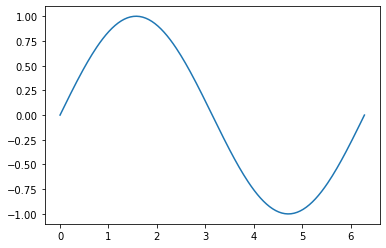

In [ ]:
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.show()

In [55]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at_indexofday'] = df['created_at'].dt.dayofweek
df_group_27 = df['created_at_indexofday'].value_counts()
df_group_27

2    1756
1    1577
3    1261
4     791
Name: created_at_indexofday, dtype: int64

In [56]:
df_plat = {}
for i in range(len(df_group_27.index)):
    if df_group_27.index[i] == 0:
      df_plat["Monday"] = df_group_27.values[i]
    if df_group_27.index[i] == 1:
      df_plat["Tuesday"] = df_group_27.values[i]
    if df_group_27.index[i] == 2:
      df_plat["Wednesday"] = df_group_27.values[i]   
    if df_group_27.index[i] == 3:
      df_plat["Thursday"] = df_group_27.values[i]
    if df_group_27.index[i] == 4:
      df_plat["Friday"] = df_group_27.values[i]
    if df_group_27.index[i] == 5:
      df_plat["Saturday"] = df_group_27.values[i]  
    if df_group_27.index[i] == 6:
      df_plat["Sunday"] = df_group_27.values[i]
    

df_plat
#df_group_27.values[0]

{'Friday': 791, 'Thursday': 1261, 'Tuesday': 1577, 'Wednesday': 1756}

In [57]:
df_plat.keys()

dict_keys(['Wednesday', 'Tuesday', 'Thursday', 'Friday'])

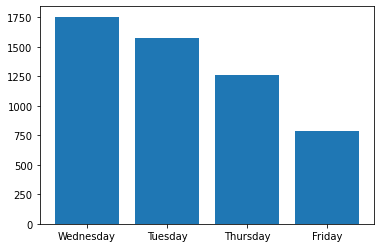

In [58]:
plt.bar(*zip(*df_plat.items()))
plt.show()